In [ ]:
!pip3 install torch torchvision

In [36]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/usr/local/opt/python@3.9/bin/python3.9
3.9.4 (default, Apr  5 2021, 01:47:16) 
[Clang 11.0.0 (clang-1100.0.33.17)]
sys.version_info(major=3, minor=9, micro=4, releaselevel='final', serial=0)


torch.Size([11]) torch.Size([11])


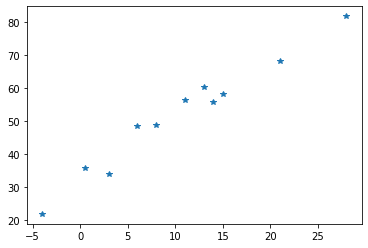

In [37]:
import numpy as np
import torch as t
from matplotlib import pyplot as plt
x_s =  [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
y_s = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
x_t = t.tensor(x_s)
y_t = t.tensor(y_s)
print(x_t.shape, y_t.shape)
plt.plot(x_s,y_s,'*')
plt.show()


In [46]:
# normalize the data
from torch.nn.functional import normalize
x_n = (x_t - t.mean(x_t))/t.std(x_t) # normalize(x_t, 2, dim = 0)# (x_t - t.mean(x_t))/t.std(x_t)
x_n


tensor([-1.0856,  0.3800,  0.4885,  1.8998,  0.0543, -0.2714, -0.8142, -1.5741,
        -0.4885,  0.2714,  1.1399])

In [47]:
y_n = (y_t - t.mean(x_t))/t.std(y_t)
y_n

tensor([1.4972, 2.6973, 2.8339, 4.2419, 2.7210, 2.2814, 1.3902, 0.6713, 2.2517,
        2.9646, 3.4399])

In [38]:
# define a linear model y = w * x + b (a line)
# find parameters a and b that minimize the error between the points 
# and the line
def model(x, w, b): 
    return w * x + b

# error (mean squared error)
# y_predict is a tensor (a vector of values) comes from the model, 
# y_true = true values - come from the training data 
def loss_fn(y_predict, y_true):
    squared_diffs = (y_predict - y_true)**2  # tensor of  errors
    return squared_diffs.mean() # sum of errors/# points



tensor(0.1000) tensor(0.)


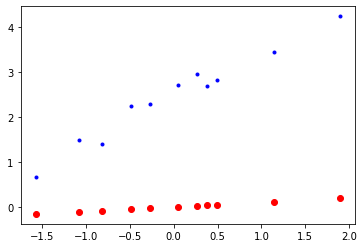

Initial loss =  tensor(6.7603)


In [49]:
w = 0.1*t.ones(())  # w = 1
b = 0.1*t.zeros(()) # b = 0
print(w, b)
y_p = model(x_n, w, b)
plt.plot(x_n, y_p,'ro')
plt.plot(x_n, y_n, 'b.')
plt.show()

# compute the error
loss0 = loss_fn(y_p,y_n)
print("Initial loss = ", loss0)

In [40]:
# gradient of loss with respect to w and b
# dLoss/dw = d (y_p - y_t)^2)/dw = dLoss/dy_p * dy_p/dw 
#          = 2 (y_p-y_t) * dy_p/dw = 
#          = 2 (y_p-y_t) * d(w*x_t + b)/dw = 
#          = 2 (y_p-y_t) * x_t
# dLoss/db = d(y_p - y_t)^2/db= dLoss/dy_p * dy_p/db =
#           = 2 (y_p-y_t) * dy_p/db =
#           = 2 (y_p-y_t) * d(w*x_t + b)/db = 
#           = 2 (y_p-y_t) 
# d x^2 / d x = 2 x 
def grad_loss (y_p, y_t):
    return 2*(y_p-y_t)/y_p.size(0)         # y_p.size(0) = n 
    
def grad_w(x_t, w, b):
    return x_t
  
def grad_b(x_t, w, b):
    return 1.0


In [55]:
# gradient descent
def training_loop(n_epochs, learning_rate, w,b  , y_t, x_t, eps = 1e-3):
    for epoch in range(1, n_epochs + 1):
        # forward pass:
        y_p  = model(x_t,w,b)   # compute the model's prediction for all x_t points
        # backward pass
        loss = loss_fn(y_p, y_t) 
        grad_all = grad_loss(y_p,y_t)  # tensor
        w = w - learning_rate * (grad_all * grad_w(x_t, w, b)).sum()
        b = b - learning_rate * (grad_all * grad_b(x_t, w, b)).sum()
        if epoch % 5 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss) ) ) 
        if (loss < 1e-3):
            break
    return w,b

In [57]:
w = 0.1*t.ones(())  # w = 1
b = 0.1*t.ones(()) # b = 0
learning_rate = 0.1 # 0.005 # learning rate 0.1, 0.01 # change it to smaller values
w_train, b_train = training_loop(100, learning_rate, w, b, y_n, x_n, 0.01)

Epoch 5, Loss 1.105566
Epoch 10, Loss 0.153341
Epoch 15, Loss 0.047779
Epoch 20, Loss 0.035998
Epoch 25, Loss 0.034674
Epoch 30, Loss 0.034523
Epoch 35, Loss 0.034506
Epoch 40, Loss 0.034504
Epoch 45, Loss 0.034504
Epoch 50, Loss 0.034504
Epoch 55, Loss 0.034504
Epoch 60, Loss 0.034504
Epoch 65, Loss 0.034504
Epoch 70, Loss 0.034504
Epoch 75, Loss 0.034504
Epoch 80, Loss 0.034504
Epoch 85, Loss 0.034504
Epoch 90, Loss 0.034504
Epoch 95, Loss 0.034504
Epoch 100, Loss 0.034504


In [58]:
print(w_train)
print(b_train)

tensor(0.9808)
tensor(2.4537)


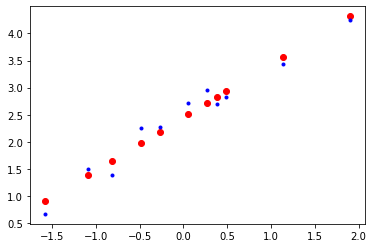

In [60]:
plt.plot(x_n, model(x_n, w_train, b_train), 'ro')
plt.plot(x_n, y_n, 'b.')
plt.show()

In [ ]:
import torch.nn as nn   # neural network module 
import torch.optim as optim # optimization module (SGD)

# nn.Linear(input_size, output_size, bias = True)
linear_model = nn.Linear(1, 1) # one neuron similar to y = w*x + b
                             # nn.Linear(2,1)  y = w1*x1 + w2*x2 + b
                             # nn.Linear(2,2)  y1 = w11*x1 + w12*x2 + b1
                             #                 y2 = w21*x1 + w22*x2 + b2
print(linear_model.weight, linear_model.bias)
print(linear_model.parameters)


In [ ]:
x = t.ones(2,1)
print(x, x.shape)
linear_model(x)

In [62]:
# split training - validation
n_samples = x_t.shape[0]
n_val = int(0.4 * n_samples) # 20 % of the samples for validation
shuffled_indices = t.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)


tensor([ 7,  3, 10,  0,  8,  1,  2]) tensor([5, 9, 4, 6])


In [63]:
x_t_2d = x_n.unsqueeze(1) # adds a dimension
y_t_2d = y_n.unsqueeze(1)
print(x_t_2d)
print(y_t_2d)

x_t_train = x_t_2d[train_indices,:]
x_t_val   = x_t_2d[val_indices,:]

y_t_train = y_t_2d[train_indices,:]
y_t_val   = y_t_2d[val_indices,:]

tensor([[-1.0856],
        [ 0.3800],
        [ 0.4885],
        [ 1.8998],
        [ 0.0543],
        [-0.2714],
        [-0.8142],
        [-1.5741],
        [-0.4885],
        [ 0.2714],
        [ 1.1399]])
tensor([[1.4972],
        [2.6973],
        [2.8339],
        [4.2419],
        [2.7210],
        [2.2814],
        [1.3902],
        [0.6713],
        [2.2517],
        [2.9646],
        [3.4399]])


In [69]:

def training_loop(n_epochs, optimizer, model, loss_fn, x_t_train, x_t_val,
                  y_t_train, y_t_val, eps = 0.01):
    for epoch in range(1, n_epochs + 1):
        # forward pass training
        y_p_train  = model(x_t_train)
        loss_train = loss_fn(y_p_train, y_t_train)
 
        
        # backwards training
        optimizer.zero_grad()  # sets gradients to 0 
        loss_train.backward()  # gradients are computed 
        optimizer.step()       # parameters ar changed

        if epoch == 1 or epoch % 10 == 0:
            # forward pass validation
            y_p_val    = model(x_t_val)
            loss_val = loss_fn(y_p_val, y_t_val)
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
f" Validation loss {loss_val.item():.4f}")
        if loss_train < eps:
            break;

In [70]:
linear_model = nn.Linear(1, 1)  # one input and one output y = w x + b
print(linear_model.parameters)
optimizer = optim.SGD(linear_model.parameters(), lr= 0.05)  # lr = learning rate
training_loop(n_epochs = 100, optimizer = optimizer,  
              model    = linear_model,
             loss_fn   = nn.MSELoss(), # error function = MSE = Mean Square Error
             x_t_train = x_t_train,  x_t_val= x_t_val,
             y_t_train = y_t_train, y_t_val = y_t_val, eps = 0.01)
# split data into training and validation


<bound method Module.parameters of Linear(in_features=1, out_features=1, bias=True)>
Epoch 1, Training loss 10.3472, Validation loss 5.8628
tensor(10.3472, grad_fn=<MseLossBackward0>)
tensor(8.0720, grad_fn=<MseLossBackward0>)
tensor(6.3100, grad_fn=<MseLossBackward0>)
tensor(4.9428, grad_fn=<MseLossBackward0>)
tensor(3.8802, grad_fn=<MseLossBackward0>)
tensor(3.0528, grad_fn=<MseLossBackward0>)
tensor(2.4073, grad_fn=<MseLossBackward0>)
tensor(1.9028, grad_fn=<MseLossBackward0>)
tensor(1.5077, grad_fn=<MseLossBackward0>)
tensor(1.1978, grad_fn=<MseLossBackward0>)
tensor(0.9543, grad_fn=<MseLossBackward0>)
tensor(0.7626, grad_fn=<MseLossBackward0>)
tensor(0.6113, grad_fn=<MseLossBackward0>)
tensor(0.4918, grad_fn=<MseLossBackward0>)
tensor(0.3973, grad_fn=<MseLossBackward0>)
tensor(0.3223, grad_fn=<MseLossBackward0>)
tensor(0.2628, grad_fn=<MseLossBackward0>)
tensor(0.2154, grad_fn=<MseLossBackward0>)
tensor(0.1777, grad_fn=<MseLossBackward0>)
tensor(0.1476, grad_fn=<MseLossBackward0>)

In [ ]:
plt.plot(x_t, model(x_t, w_train, b_train), 'ro')
plt.plot(x_t, y_t, 'b.')
plt.show()